In [1]:
# Importing tensorflow

import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

# Importing required libraries

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,GlobalAveragePooling2D
import numpy as np
from tensorflow.keras.applications import EfficientNetB1,EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import glob
import os
import cv2
import pandas as pd

In [6]:
# Define Train and Test Path

train_path = r'C:\Users\Suhas V S\Music\GreatLearing_MTECH\Sem2\DL\personal\brain_mri_data\Training'
valid_path = r'C:\Users\Suhas V S\Music\GreatLearing_MTECH\Sem2\DL\personal\brain_mri_data\Testing'

In [7]:
# Directories in train path

os.listdir(train_path)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [8]:
# COnvert the images in the directories into array and store the labels in y_train and y_test

trainX = list()
trainy = list()
for a in os.listdir(train_path):
    sub_directory = os.path.join(train_path,a)
    for b in os.listdir(sub_directory):
        img_read_train = cv2.imread(os.path.join(sub_directory,b))
        img_resize_train = cv2.resize(img_read_train,(150, 150))
        trainX.append(img_resize_train)
        trainy.append(a)

testX = list()
testy = list()
        
for c in os.listdir(valid_path):
    sub_directory_test = os.path.join(valid_path,c)
    for d in os.listdir(sub_directory_test):
        img_test = cv2.imread(os.path.join(sub_directory_test,d))
        img_test_resize = cv2.resize(img_test,(150,150))
        testX.append(img_test_resize)
        testy.append(c)
        
X_train = np.array(trainX)
y_train = np.array(trainy)
X_test=np.array(testX)
y_test=np.array(testy)

In [13]:
# Count of trian labels

y_train_series=pd.Series(y_train)
y_train_series.value_counts()

pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor            395
dtype: int64

In [14]:
# Count of test labels

y_test_series=pd.Series(y_test)
y_test_series.value_counts()

meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
dtype: int64

# Visualize random 5 images from each label

In [15]:
def viz_label(name):
  plt.figure(figsize=(15,15))
  print("Random 5 images of ",name)
  for m in range(5):    
      plt.subplot(1,5,m+1)
      image_folder = train_path+'/'+name
      random_image = np.random.choice(os.listdir(image_folder))
      image_ = plt.imshow(plt.imread(image_folder+"/"+random_image))
  plt.show()

Random 5 images of  pituitary_tumor


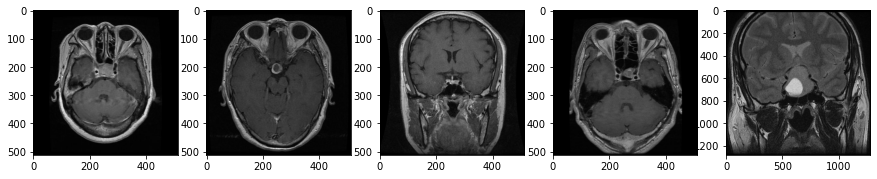

In [16]:
viz_label("pituitary_tumor")

Random 5 images of  glioma_tumor


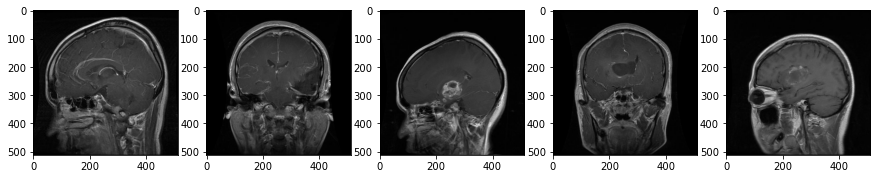

In [17]:
viz_label("glioma_tumor")

Random 5 images of  meningioma_tumor


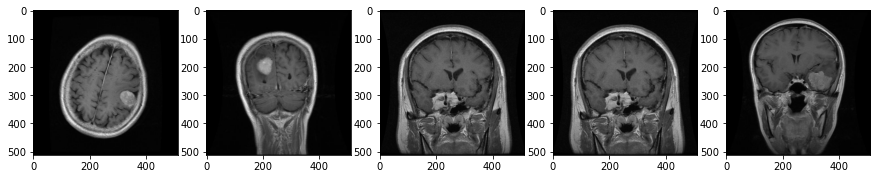

In [18]:
viz_label("meningioma_tumor")

Random 5 images of  no_tumor


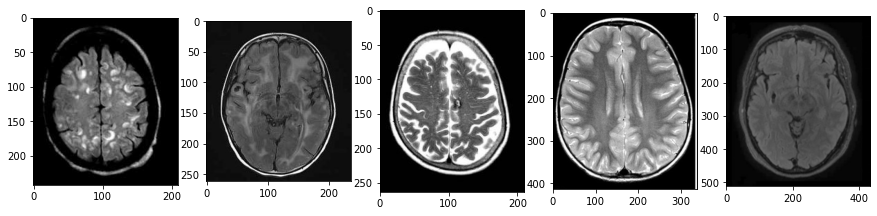

In [19]:
viz_label("no_tumor")

In [20]:
# One-Hot Encode the labels

y_train_oh = pd.get_dummies(y_train_series)
y_train_oh.head()

,glioma_tumor,meningioma_tumor,no_tumor,pituitary_tumor
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [21]:
y_train_oh.columns

Index(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'], dtype='object')

In [22]:
y_train_oh=y_train_oh.values
y_train_oh

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [23]:
y_train[0]

'glioma_tumor'

In [24]:
y_train_oh[0]

array([1, 0, 0, 0], dtype=uint8)

In [25]:
y_test_oh = pd.get_dummies(y_test_series)
y_test_oh.head()

,glioma_tumor,meningioma_tumor,no_tumor,pituitary_tumor
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [26]:
y_test_oh.columns

Index(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'], dtype='object')

In [27]:
y_test_oh=y_test_oh.values
y_test_oh

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [28]:
y_test[1]

'glioma_tumor'

In [29]:
y_test_oh[1]

array([1, 0, 0, 0], dtype=uint8)

In [30]:
# Use ImageDataGenerator for getting different versions of the training images.

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
datagen.fit(X_train)

In [31]:
# Instantiating EfficientnetB1 Trained model with include_top=False to exclude the top Dense layers in efb1 variable.

efb1=EfficientNetB1(input_shape=[150,150,3],include_top=False)

27025408/27018416 [==============================] - 122s 5us/step


In [32]:
efb1.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 150, 150, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [33]:
# Freeze the lower convolution layers of the efb1

efb1.trainable=False
efb1.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 150, 150, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [34]:
# Successfully froze the convolution layers.

In [35]:
# Import Early Stopping to check on overfitting

from tensorflow.keras.callbacks import EarlyStopping
cb=[EarlyStopping(monitor="val_loss",patience=2,mode="min",min_delta=0.01)]

In [39]:
# Take the weights from pre-trained for efb1 model frozen conv2D layers
# Train the dense models where back propagation optimization happens.

transfer_efb1=Sequential([efb1,
                          GlobalAveragePooling2D(),
                          Dense(4,activation="softmax")
                          ])

# Complile

transfer_efb1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# Fit the model

hist=transfer_efb1.fit(X_train,y_train_oh,validation_split=0.2, epochs =10, batch_size=16,
                   callbacks=[cb])

Epoch 1/10
144/144 [==============================] - 73s 509ms/step - loss: 0.8648 - accuracy: 0.6394 - val_loss: 1.3449 - val_accuracy: 0.4216
Epoch 2/10
144/144 [==============================] - 70s 484ms/step - loss: 0.5477 - accuracy: 0.7901 - val_loss: 0.9205 - val_accuracy: 0.6220
Epoch 3/10
144/144 [==============================] - 69s 476ms/step - loss: 0.4696 - accuracy: 0.8214 - val_loss: 0.9856 - val_accuracy: 0.5767
Epoch 4/10
144/144 [==============================] - 76s 530ms/step - loss: 0.4160 - accuracy: 0.8489 - val_loss: 0.9243 - val_accuracy: 0.6341


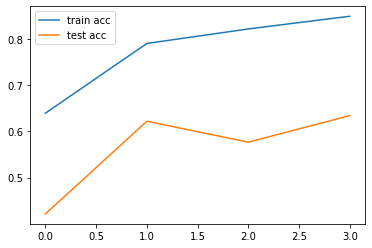

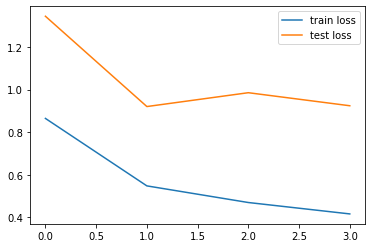

In [40]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"],label="train acc")
plt.plot(hist.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist.history["loss"],label="train loss")
plt.plot(hist.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# There is significant overfitting on the train even with early stopping call backs. Try it on EfficientNetB0

In [48]:
# Instantiating EfficientnetB0 Trained model with include_top=False to exclude the top Dense layers in efb1 variable.

efb0=EfficientNetB0(input_shape=[150,150,3],include_top=False)

In [50]:
transfer_efb0=Sequential([efb0,
                          GlobalAveragePooling2D(),
                          Dense(4,activation="softmax")
                          ])

# Compile

transfer_efb0.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

cb=[EarlyStopping(monitor="val_loss",patience=4,mode="min",min_delta=0.01)]

# Fit the model

hist_efb0=transfer_efb0.fit(X_train,y_train_oh,validation_split=0.2, epochs =20, batch_size=16,
                   callbacks=[cb])

Epoch 1/20
144/144 [==============================] - 296s 2s/step - loss: 0.1107 - accuracy: 0.9656 - val_loss: 0.5348 - val_accuracy: 0.8537
Epoch 2/20
144/144 [==============================] - 270s 2s/step - loss: 0.0720 - accuracy: 0.9782 - val_loss: 1.8671 - val_accuracy: 0.6289
Epoch 3/20
144/144 [==============================] - 262s 2s/step - loss: 0.0383 - accuracy: 0.9869 - val_loss: 0.9347 - val_accuracy: 0.8014
Epoch 4/20
144/144 [==============================] - 283s 2s/step - loss: 0.0450 - accuracy: 0.9852 - val_loss: 0.2420 - val_accuracy: 0.9233
Epoch 5/20
144/144 [==============================] - 285s 2s/step - loss: 0.1279 - accuracy: 0.9595 - val_loss: 0.2565 - val_accuracy: 0.8955
Epoch 6/20
144/144 [==============================] - 411s 3s/step - loss: 0.0491 - accuracy: 0.9852 - val_loss: 0.8236 - val_accuracy: 0.7666
Epoch 7/20
144/144 [==============================] - 309s 2s/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 1.5957 - val_accuracy: 0.6934

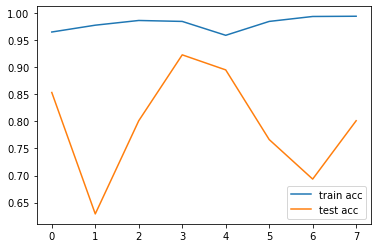

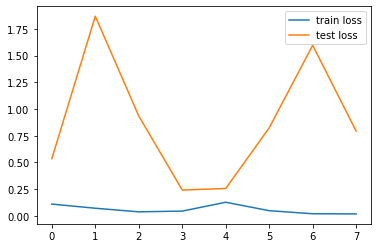

In [51]:
plt.plot(hist_efb0.history["accuracy"],label="train acc")
plt.plot(hist_efb0.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist_efb0.history["loss"],label="train loss")
plt.plot(hist_efb0.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# The model showed better convergence for a few epochs hence we add checkpoint to capture the best result.

In [45]:
# Importing Model Check Point

from tensorflow.keras.callbacks import ModelCheckpoint

In [54]:
transfer_efb0=Sequential([efb0,
                          GlobalAveragePooling2D(),
                          Dropout(0.2),
                          Dense(4,activation="softmax")
                          ])

# Complile

transfer_efb0.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

ES=EarlyStopping(monitor="val_loss",patience=4,mode="min",min_delta=0.01)
CP = ModelCheckpoint("efbo.h5",monitor="val_accuracy",save_best_only=True,mode="auto")

# Fit the model

hist_efb0_1=transfer_efb0.fit(X_train,y_train_oh,validation_split=0.2, epochs =20, batch_size=16,
                   callbacks=[ES,CP])

Epoch 1/20
144/144 [==============================] - 255s 2s/step - loss: 0.0789 - accuracy: 0.9765 - val_loss: 0.3616 - val_accuracy: 0.9199
Epoch 2/20
144/144 [==============================] - 270s 2s/step - loss: 0.0250 - accuracy: 0.9895 - val_loss: 0.7908 - val_accuracy: 0.8624
Epoch 3/20
144/144 [==============================] - 320s 2s/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0668 - val_accuracy: 0.9861
Epoch 4/20
144/144 [==============================] - 343s 2s/step - loss: 0.0458 - accuracy: 0.9839 - val_loss: 1.1404 - val_accuracy: 0.7683
Epoch 5/20
144/144 [==============================] - 312s 2s/step - loss: 0.0294 - accuracy: 0.9891 - val_loss: 0.5887 - val_accuracy: 0.8537
Epoch 6/20
144/144 [==============================] - 314s 2s/step - loss: 0.0468 - accuracy: 0.9813 - val_loss: 0.5935 - val_accuracy: 0.8571
Epoch 7/20
144/144 [==============================] - 310s 2s/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 1.0479 - val_accuracy: 0.7875

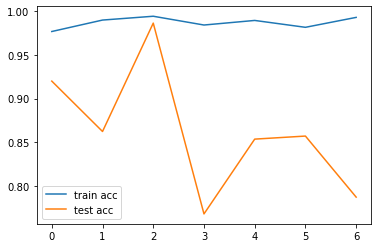

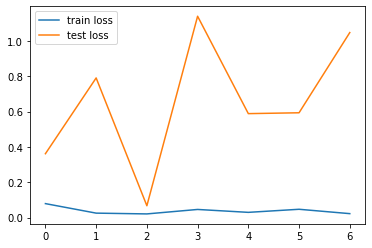

In [55]:
plt.plot(hist_efb0_1.history["accuracy"],label="train acc")
plt.plot(hist_efb0_1.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist_efb0_1.history["loss"],label="train loss")
plt.plot(hist_efb0_1.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# The Overfitting too high. Hence we need to increase the drop out rate.

In [56]:
# Best Model

transfer_efb0=Sequential([efb0,
                          GlobalAveragePooling2D(),
                          Dropout(0.4),
                          Dense(4,activation="softmax")
                          ])

# Complile

transfer_efb0.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

ES=EarlyStopping(monitor="val_loss",patience=4,mode="min",min_delta=0.01)
CP = ModelCheckpoint("efbo.h5",monitor="val_accuracy",save_best_only=True,mode="auto")

# Fit the model

hist_efb0_2=transfer_efb0.fit(X_train,y_train_oh,validation_split=0.2, epochs =20, batch_size=16,
                   callbacks=[ES,CP])

Epoch 1/20
144/144 [==============================] - 236s 2s/step - loss: 0.0672 - accuracy: 0.9804 - val_loss: 0.7271 - val_accuracy: 0.7944
Epoch 2/20
144/144 [==============================] - 236s 2s/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.3838 - val_accuracy: 0.9408
Epoch 3/20
144/144 [==============================] - 236s 2s/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.1721 - val_accuracy: 0.9547
Epoch 4/20
144/144 [==============================] - 239s 2s/step - loss: 0.0298 - accuracy: 0.9922 - val_loss: 1.3879 - val_accuracy: 0.6307
Epoch 5/20
144/144 [==============================] - 296s 2s/step - loss: 0.0508 - accuracy: 0.9865 - val_loss: 0.4121 - val_accuracy: 0.8990
Epoch 6/20
144/144 [==============================] - 277s 2s/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.2997 - val_accuracy: 0.9024
Epoch 7/20
144/144 [==============================] - 278s 2s/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.2105 - val_accuracy: 0.9547

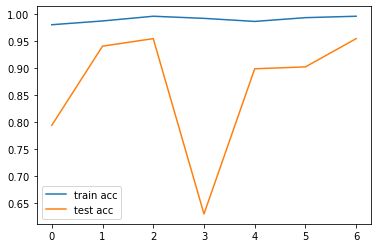

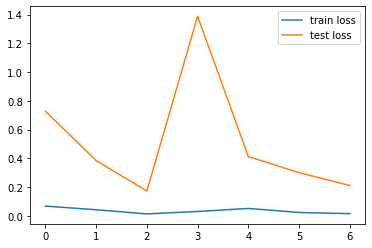

In [57]:
plt.plot(hist_efb0_2.history["accuracy"],label="train acc")
plt.plot(hist_efb0_2.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist_efb0_2.history["loss"],label="train loss")
plt.plot(hist_efb0_2.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# After increasing the drop out to 40%, the generalisation improved.
# Let us try with batch normalization instead of dropout

In [58]:
transfer_efb0=Sequential([efb0,
                          GlobalAveragePooling2D(),
                          BatchNormalization(),
                          Dense(4,activation="softmax")
                          ])

# Complile

transfer_efb0.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

ES=EarlyStopping(monitor="val_loss",patience=4,mode="min",min_delta=0.01)
CP = ModelCheckpoint("efbo.h5",monitor="val_accuracy",save_best_only=True,mode="auto")

# Fit the model

hist_efb0_3=transfer_efb0.fit(X_train,y_train_oh,validation_split=0.2, epochs =20, batch_size=16,
                   callbacks=[ES,CP])

Epoch 1/20
144/144 [==============================] - 239s 2s/step - loss: 0.0747 - accuracy: 0.9752 - val_loss: 0.1685 - val_accuracy: 0.9408
Epoch 2/20
144/144 [==============================] - 247s 2s/step - loss: 0.0154 - accuracy: 0.9939 - val_loss: 1.1582 - val_accuracy: 0.7578
Epoch 3/20
144/144 [==============================] - 247s 2s/step - loss: 0.0245 - accuracy: 0.9935 - val_loss: 0.5180 - val_accuracy: 0.8484
Epoch 4/20
144/144 [==============================] - 242s 2s/step - loss: 0.0758 - accuracy: 0.9830 - val_loss: 2.0656 - val_accuracy: 0.6429
Epoch 5/20
144/144 [==============================] - 245s 2s/step - loss: 0.1362 - accuracy: 0.9708 - val_loss: 0.6581 - val_accuracy: 0.8798


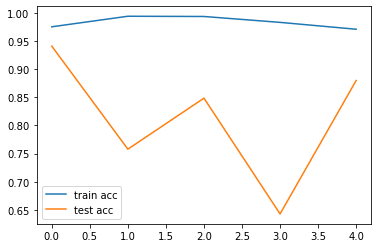

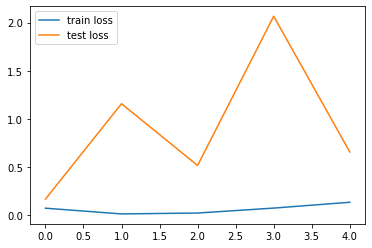

In [59]:
plt.plot(hist_efb0_3.history["accuracy"],label="train acc")
plt.plot(hist_efb0_3.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist_efb0_3.history["loss"],label="train loss")
plt.plot(hist_efb0_3.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# Batch normalization decreased the generalization. Let us now go back to dropout of 40% and Reduce learning rate when a metric has stopped improving.

In [60]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [64]:
transfer_efb0=Sequential([efb0,
                          GlobalAveragePooling2D(),
                          Dropout(0.4),
                          Dense(4,activation="softmax")
                          ])

# Complile

transfer_efb0.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

TB = TensorBoard(log_dir = 'logs')
CP = ModelCheckpoint("efbo.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
LR = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

# Fit the model

hist_efb0_4=transfer_efb0.fit(X_train,y_train_oh,validation_split=0.2, epochs =20, batch_size=16,
                   callbacks=[TB,CP,LR])

Epoch 1/20
144/144 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9930
Epoch 00001: val_accuracy improved from -inf to 0.84146, saving model to efbo.h5
144/144 [==============================] - 267s 2s/step - loss: 0.0333 - accuracy: 0.9930 - val_loss: 0.8436 - val_accuracy: 0.8415
Epoch 2/20
144/144 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9987
Epoch 00002: val_accuracy improved from 0.84146 to 0.87456, saving model to efbo.h5
144/144 [==============================] - 244s 2s/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 0.4469 - val_accuracy: 0.8746
Epoch 3/20
144/144 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9821
Epoch 00003: val_accuracy did not improve from 0.87456
144/144 [==============================] - 253s 2s/step - loss: 0.0663 - accuracy: 0.9821 - val_loss: 0.8160 - val_accuracy: 0.7979
Epoch 4/20
144/144 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9926


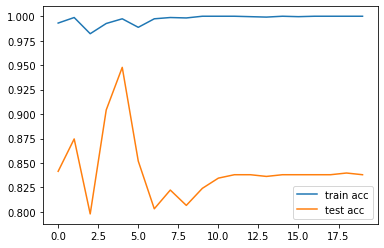

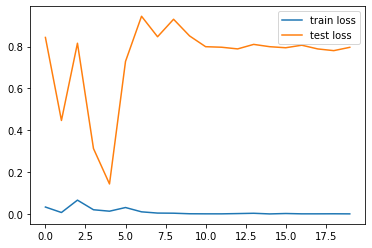

In [65]:
plt.plot(hist_efb0_4.history["accuracy"],label="train acc")
plt.plot(hist_efb0_4.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist_efb0_4.history["loss"],label="train loss")
plt.plot(hist_efb0_4.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [72]:
predictions = transfer_efb0.predict(X_test)
predictions

array([[1.6590202e-02, 9.5974523e-01, 2.1475215e-02, 2.1893647e-03],
       [2.8118578e-04, 9.9945432e-01, 1.5201290e-04, 1.1249689e-04],
       [7.0547176e-05, 9.9982065e-01, 8.2130515e-05, 2.6660977e-05],
       ...,
       [2.3923123e-05, 3.2715721e-05, 7.5896409e-05, 9.9986744e-01],
       [2.5973696e-07, 4.6993214e-06, 3.4083140e-08, 9.9999499e-01],
       [2.1442898e-04, 9.9941909e-01, 9.0480262e-06, 3.5740976e-04]],
      dtype=float32)

In [73]:
predictions = np.argmax(predictions,axis=1)
predictions

array([1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [76]:
y_test_oh_new=np.argmax(y_test_oh,axis=1)
y_test_oh_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test_oh_new,predictions))

              precision    recall  f1-score   support

           0       0.96      0.24      0.38       100
           1       0.66      0.98      0.79       115
           2       0.70      1.00      0.82       105
           3       1.00      0.65      0.79        74

    accuracy                           0.74       394
   macro avg       0.83      0.72      0.70       394
weighted avg       0.81      0.74      0.70       394

